<a href="https://colab.research.google.com/github/bluecityisu/class2022/blob/main/menwomen_scratch_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/menwomen/menwomen.zip \
    -O /tmp/mw.zip

--2023-01-28 16:05:31--  https://storage.googleapis.com/menwomen/menwomen.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 635961943 (606M) [application/x-zip-compressed]
Saving to: ‘/tmp/mw.zip’

/tmp/mw.zip         100%[===================>] 606.50M  26.4MB/s    in 24s     

2023-01-28 16:05:55 (25.6 MB/s) - ‘/tmp/mw.zip’ saved [635961943/635961943]



In [2]:
import os
import zipfile
local_zip = '/tmp/mw.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/menwomen')
zip_ref.close()

In [20]:
import tensorflow as tf

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
     

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [7]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/menwomen/menwomen/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/menwomen/menwomen/val',
        target_size=(150, 150),
        class_mode='categorical')

Found 3085 images belonging to 2 classes.
Found 224 images belonging to 2 classes.


In [8]:
history = model.fit(
      train_generator,  
      epochs=15,
      validation_data=validation_generator)

Epoch 1/15
25/25 [==============================] - 156s 6s/step - loss: 0.7476 - acc: 0.5624 - val_loss: 0.7109 - val_acc: 0.5312
Epoch 2/15
25/25 [==============================] - 129s 5s/step - loss: 0.6531 - acc: 0.6175 - val_loss: 0.7058 - val_acc: 0.5580
Epoch 3/15
25/25 [==============================] - 128s 5s/step - loss: 0.6554 - acc: 0.6337 - val_loss: 0.7090 - val_acc: 0.5848
Epoch 4/15
25/25 [==============================] - 129s 5s/step - loss: 0.6432 - acc: 0.6331 - val_loss: 0.7102 - val_acc: 0.5714
Epoch 5/15
25/25 [==============================] - 127s 5s/step - loss: 0.6280 - acc: 0.6561 - val_loss: 0.7663 - val_acc: 0.5536
Epoch 6/15
25/25 [==============================] - 130s 5s/step - loss: 0.6285 - acc: 0.6480 - val_loss: 0.7372 - val_acc: 0.5446
Epoch 7/15
25/25 [==============================] - 128s 5s/step - loss: 0.6351 - acc: 0.6425 - val_loss: 0.7122 - val_acc: 0.6027
Epoch 8/15
25/25 [==============================] - 126s 5s/step - loss: 0.6197 - a

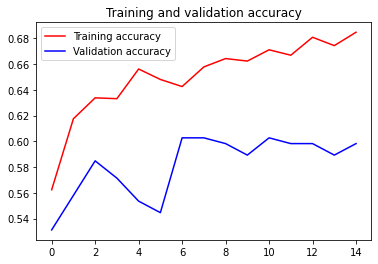

<Figure size 432x288 with 0 Axes>

In [9]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
model.save("content/drive/MyDrive/menwomen/tmp/rps.h5")

In [11]:
new_model = tf.keras.models.load_model('content/drive/MyDrive/menwomen/tmp/rps.h5')

1/1 [==============================] - 0s 23ms/step
[[0.903 0.097]]
0


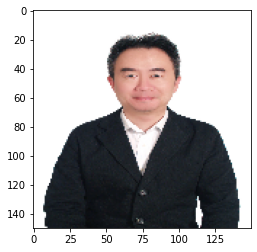

In [24]:
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img_height=150
img_width=150
#img_path = r'/content/drive/MyDrive/class/202209/pic/train/women/00000013.jpg'
#img_path = r'/content/drive/MyDrive/class/202209/pic/train/men/00000021.jpg'
img_path=r'/content/drive/MyDrive/menwomen/yang.jpg'
#img_path=r'/content/drive/MyDrive/menwomen/陳冠儒.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_tensor = image.img_to_array(img)
img_tensor1 = np.expand_dims(img_tensor, axis=0)
img_tensor1 = img_tensor1/255.0
img_tensor2 = np.vstack([img_tensor1])

featuremap = new_model.predict(img_tensor2)
plt.imshow(img)
print(np.around(featuremap,3))
print(featuremap.argmax())